# 1. Decision Tree

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('Datasets/classification/breast-cancer-wisconsin.csv')
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [4]:
df.shape

(569, 32)

In [5]:
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

## Preprocess

### 1. Check and handle missing values

In [6]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### 2. Encoding categorical feature

- while decision trees can work with categorical data, we convert categorical features to numerical data using an appropriate encoding technique.

In [7]:
df.select_dtypes('object').tail(5)

,diagnosis
564,M
565,M
566,M
567,M
568,B


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_features = 'diagnosis'
le.fit(df[cat_features].unique())
df[cat_features] = le.transform(df[cat_features])
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


## Train test split

In [9]:
x = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [11]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print()
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (455, 30)
y_train: (455,)

x_test: (114, 30)
y_test: (114,)


## Normalization

In [15]:
x_train.min(), x_train.max()

(0.0, 4254.0)

In [16]:
normz = StandardScaler()

x_train = normz.fit_transform(x_train)
x_test = normz.transform(x_test)

In [17]:
x_train.min(), x_train.max()

(-3.100011345678773, 11.31029435566468)

## Train a decision tree classifier

In [12]:
dt = DecisionTreeClassifier(max_depth=100, random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=100, random_state=42)

### Evaluate the accuracy of the decision tree classifier on the test set

In [13]:
y_pred = dt.predict(x_test)
print("Accuracy on Test:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy on Test: 0.9473684210526315
Confusion Matrix:
 [[68  3]
 [ 3 40]]


## Plot tree

### 1. With built-in scikit-learn function

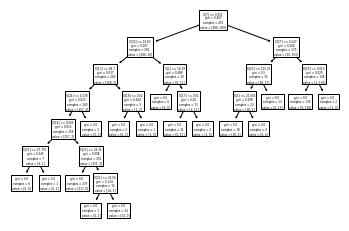

In [14]:
from sklearn import tree
tree.plot_tree(dt);

### 2. With graphviz

- conda install python-graphviz

In [15]:
import graphviz 
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("breast-cancer")

'breast-cancer.pdf'

# 2. Decision Tree with RandomSearch

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn import tree

In [18]:
df = pd.read_csv('Datasets/classification/breast-cancer-wisconsin.csv')
x = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

## Train test split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

## Define the model and hyperparameters for random search

In [21]:
dt = DecisionTreeClassifier()

params = {
    'max_depth': np.arange(1, 21),
    'min_samples_split': np.arange(2, 51),
    'min_samples_leaf': np.arange(1, 21),
    'criterion': ['gini', 'entropy']
}

## Implement random search

In [22]:
rs = RandomizedSearchCV(dt, params, n_iter=100, cv=5, random_state=42)
rs.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
                   random_state=42)

### Evaluate the performance of the decision tree on the testing data set

In [23]:
print("Best parameters: ", rs.best_params_)
print("Best score: ", rs.best_score_)

print()

y_pred = rs.predict(x_test)
print("Accuracy on Test:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best parameters:  {'min_samples_split': 5, 'min_samples_leaf': 14, 'max_depth': 17, 'criterion': 'entropy'}
Best score:  0.9384615384615385

Accuracy on Test: 0.9649122807017544
Confusion Matrix:
 [[71  0]
 [ 4 39]]


# 3. Decision Tree with GridSearch

In [24]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

## Read data

In [25]:
data = load_breast_cancer()

## train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

## Create GridSearchCV

In [27]:
params = {'max_leaf_nodes': list(range(2, 50)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [28]:
print("Best parameters: ", grid_search_cv.best_params_)
print("Best score: ", grid_search_cv.best_score_)

print()

y_pred = grid_search_cv.predict(x_test)
print("Accuracy on Test:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best parameters:  {'max_leaf_nodes': 9, 'min_samples_split': 2}
Best score:  0.931924882629108

Accuracy on Test: 0.958041958041958
Confusion Matrix:
 [[51  3]
 [ 3 86]]


## Changing the max_depth

In [29]:
train_accuracy = []
validation_accuracy = []

for depth in range(1, 8):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(x_train, y_train)
    train_accuracy.append(dt.score(x_train, y_train))
    validation_accuracy.append(dt.score(x_test, y_test))

In [30]:
frame = pd.DataFrame({'max_depth':range(1, 8), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head(6)

,max_depth,train_acc,valid_acc
0,1,0.922535,0.895105
1,2,0.946009,0.916084
2,3,0.971831,0.958042
3,4,0.995305,0.951049
4,5,0.995305,0.958042
5,6,0.997653,0.951049


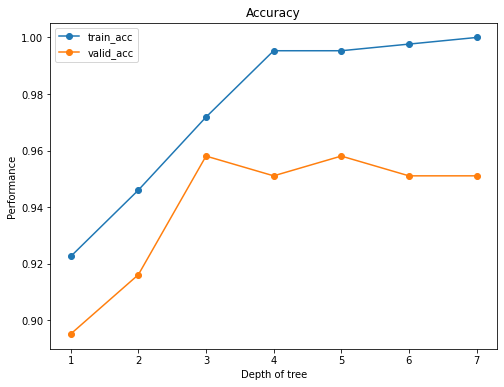

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.title('Accuracy')
plt.legend(['train_acc', 'valid_acc'], loc='upper left');

# 4. Implementation of a Random forest classifier 

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

In [33]:
data = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate the accuracy of the random forest classifier

In [34]:
y_pred = rf.predict(x_test)
print("Accuracy on Test:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy on Test: 0.9649122807017544
Confusion Matrix:
 [[40  3]
 [ 1 70]]


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from pyswarm import pso

In [58]:
df = pd.read_csv('breast-cancer-wisconsin.csv')
x = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

# Defining the fitness function
def fitness_function(params):
    clf.set_params(max_leaf_nodes=9, min_samples_split=2, max_depth=50)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    return metrics.accuracy_score(y_test, y_pred)

# Setting the lower-bound and upper-bound for the parameters
lb = [1, 2, 5, 10]
ub = [10, 20, 30, 40]

# Running the Particle Swarm Optimization algorithm
xopt, fopt = pso(fitness_function, lb, ub, swarmsize=100)

# Training the decision tree classifier with the optimal parameters
clf.set_params(max_leaf_nodes=int(xopt[3]), min_samples_split=int(xopt[1]), max_depth=int(xopt[2]))
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

Stopping search: maximum iterations reached --> 100
Accuracy: 0.9385964912280702
Confusion Matrix:
 [[67  4]
 [ 3 40]]


In [59]:
xopt

array([ 9.51623269, 10.59591209, 19.68744734, 16.83862851])

In [61]:
fopt

0.956140350877193

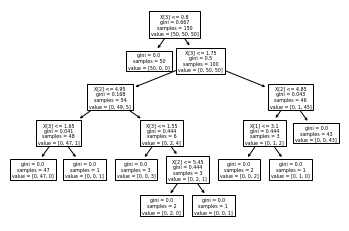

In [62]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf);

In [63]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("breast-cancer-PSO")

'breast-cancer-PSO.pdf'